In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
import ds_functions as ds
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

from data import get_hf_data, get_t_data
from strategies import *

# Heart Failure Dataset

In [9]:
hf_data_raw = get_hf_data()

## Data Balancing

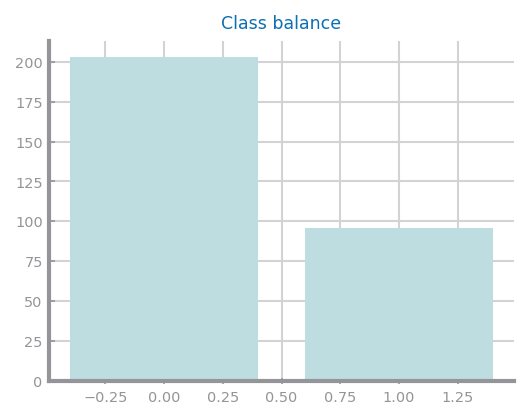

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


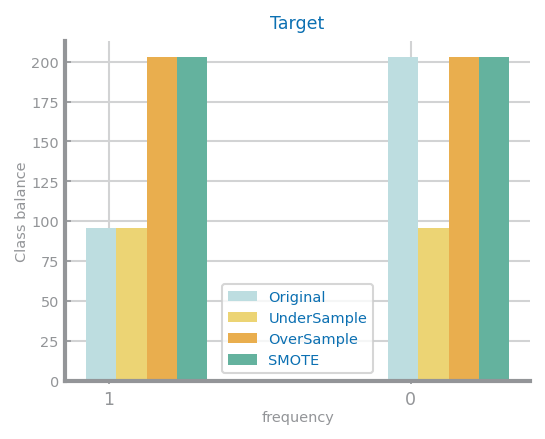

In [3]:
getBalancing(hf_data_raw, 'DEATH_EVENT')

## Try other approaches

In [2]:
hf_data_undersample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="undersample")
hf_data_oversample = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="oversample")
hf_data_smote = get_hf_data(filter_outliers=False, feature_selection=False, scaling="none", balancing="smote")

### Random Forests

100%|██████████| 180/180 [00:35<00:00,  2.92it/s]

<Figure size 600x450 with 0 Axes>

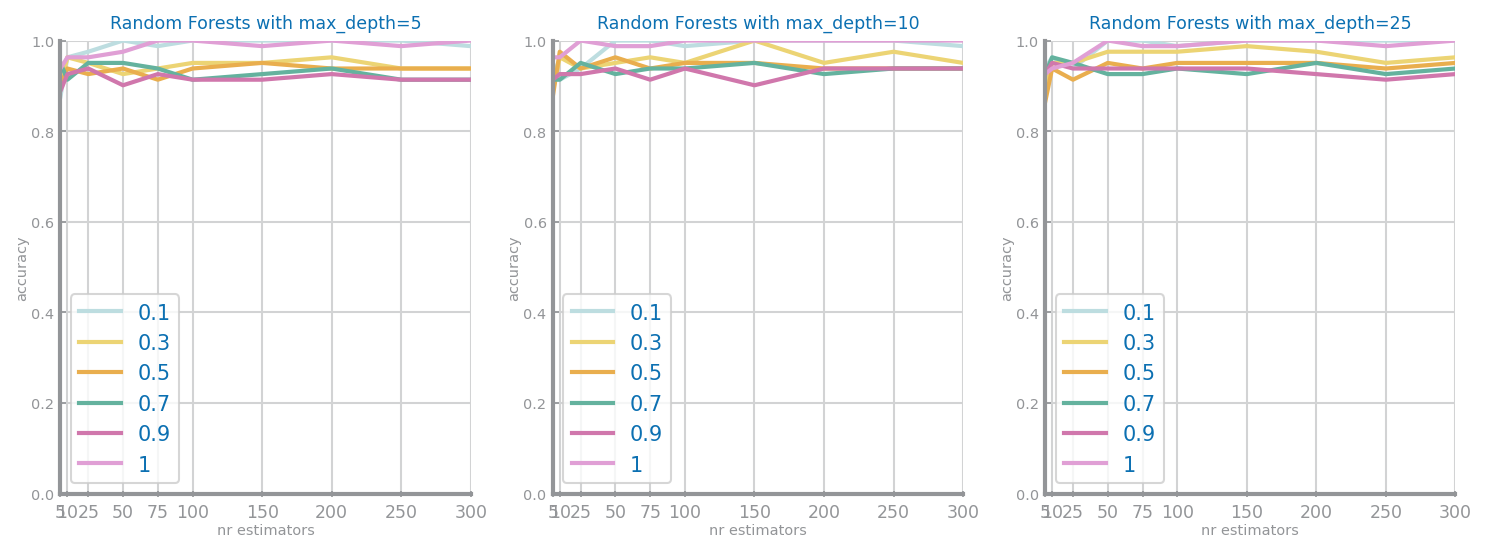

Best results with depth=5, 0.10 features and 50 estimators, with accuracy=1.0000


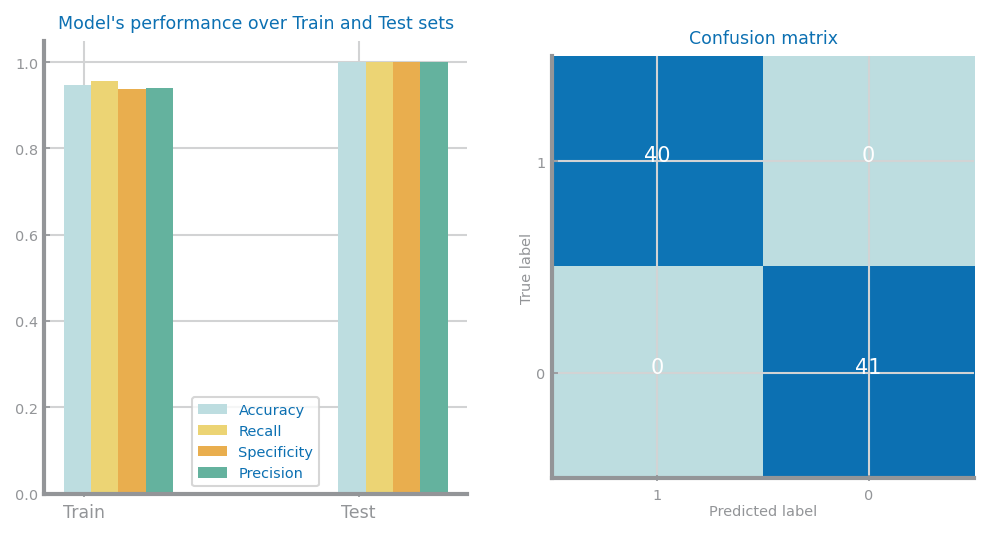

In [3]:
trnX, tstX, y, trnY, tstY, best_tree = randomForests(hf_data_smote, 'DEATH_EVENT')

### Decision Tree

100%|██████████| 60/60 [00:00<00:00, 336.64it/s]


<Figure size 600x450 with 0 Axes>

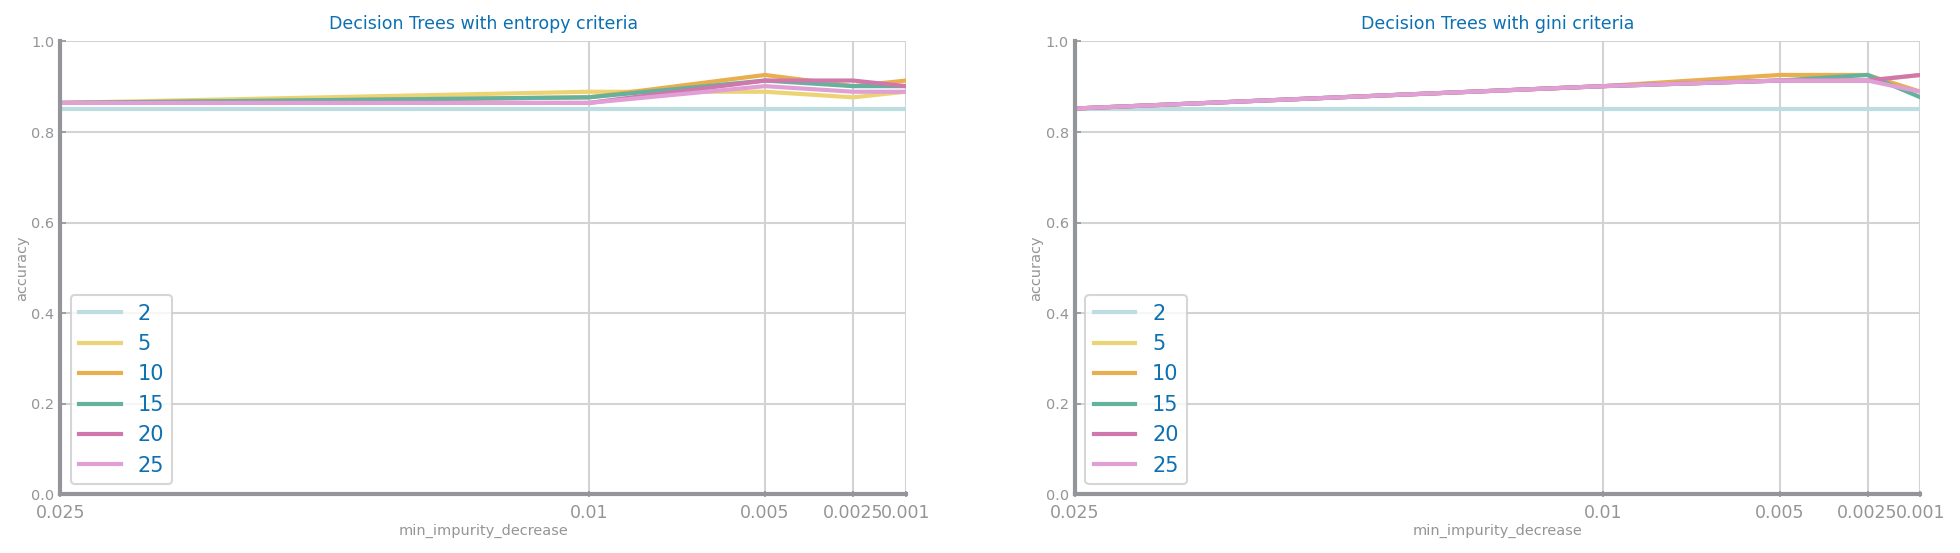

Best results achieved with entropy criteria, depth=10 and min_impurity_decrease=0.005 ==> accuracy=0.926


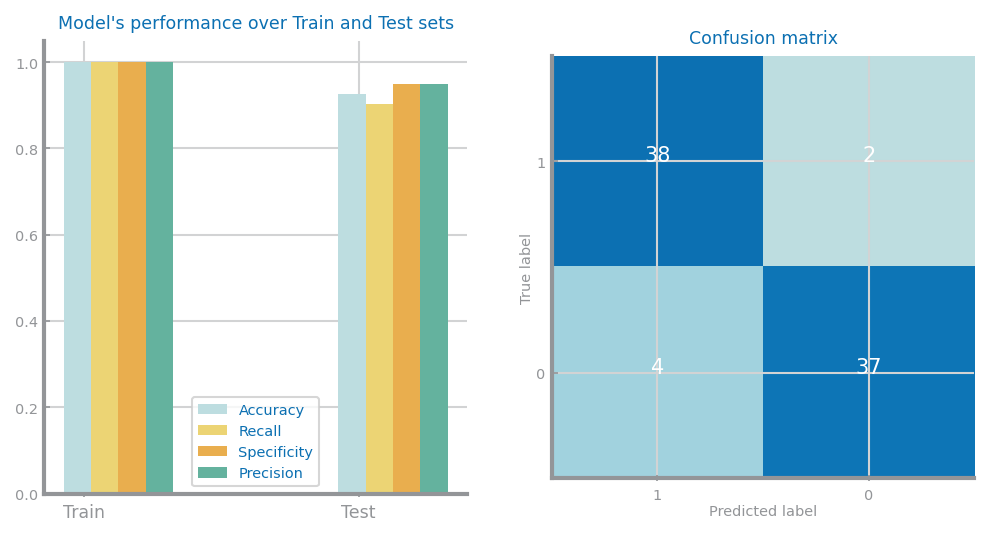

In [5]:
trnX, tstX, y, trnY, tstY, best_tree = decisionTrees(hf_data_smote, 'DEATH_EVENT')

### KNN

100%|██████████| 30/30 [00:00<00:00, 216.86it/s]


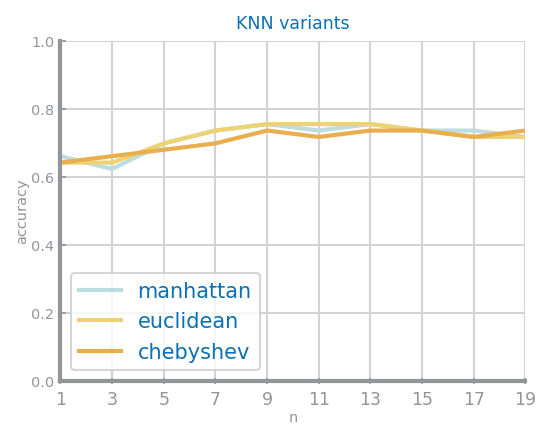

Best results with 9 neighbors and manhattan, with accuracy 0.75


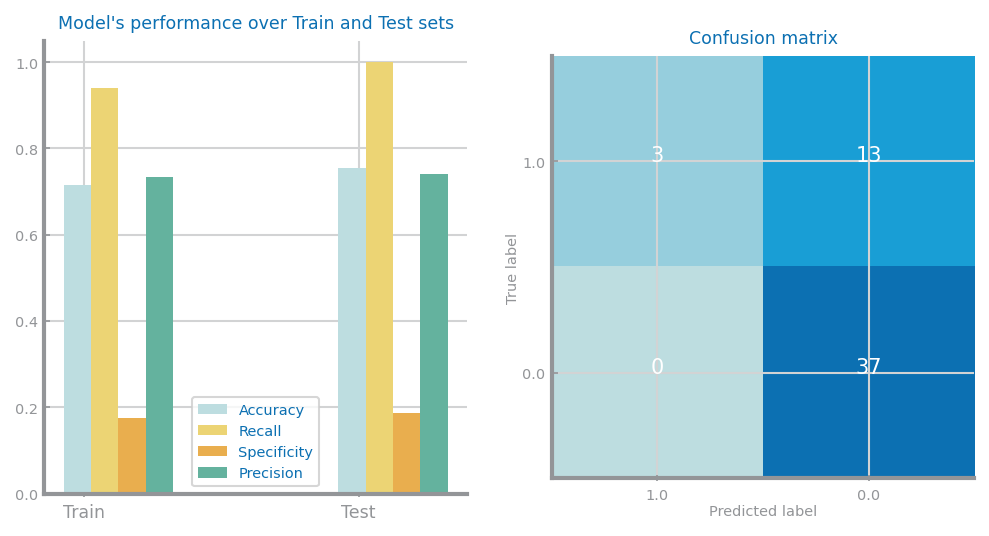

In [13]:
hf_knn_data = get_hf_data(filter_outliers=True, feature_selection=True, scaling="minmax", balancing="none")
trnX, tstX, y, trnY, tstY, best_tree = KNN(hf_knn_data, 'DEATH_EVENT')

### Logistic Regression

100%|██████████| 12/12 [00:00<00:00, 20.43it/s]


<Figure size 600x450 with 0 Axes>

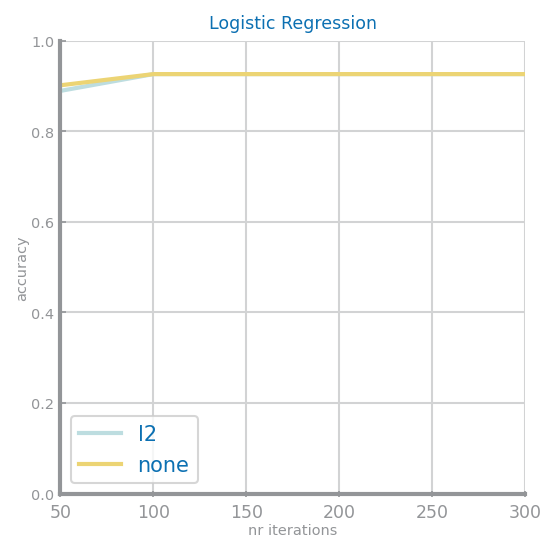

  0%|          | 0/6 [00:00<?, ?it/s]

Best results with 100 iterations and l2 penalty, with accuracy=0.9259


100%|██████████| 6/6 [00:00<00:00, 17.84it/s]


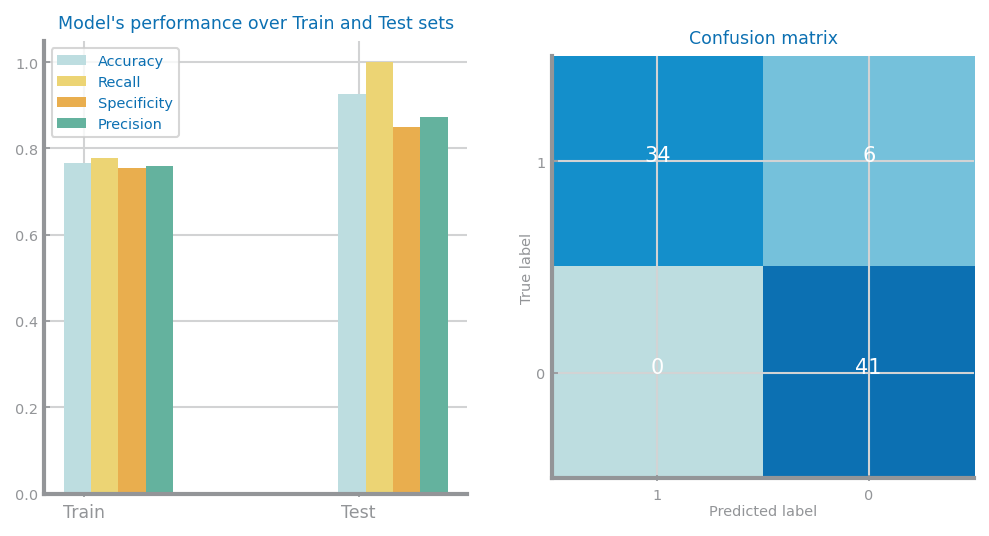

<Figure size 600x450 with 0 Axes>

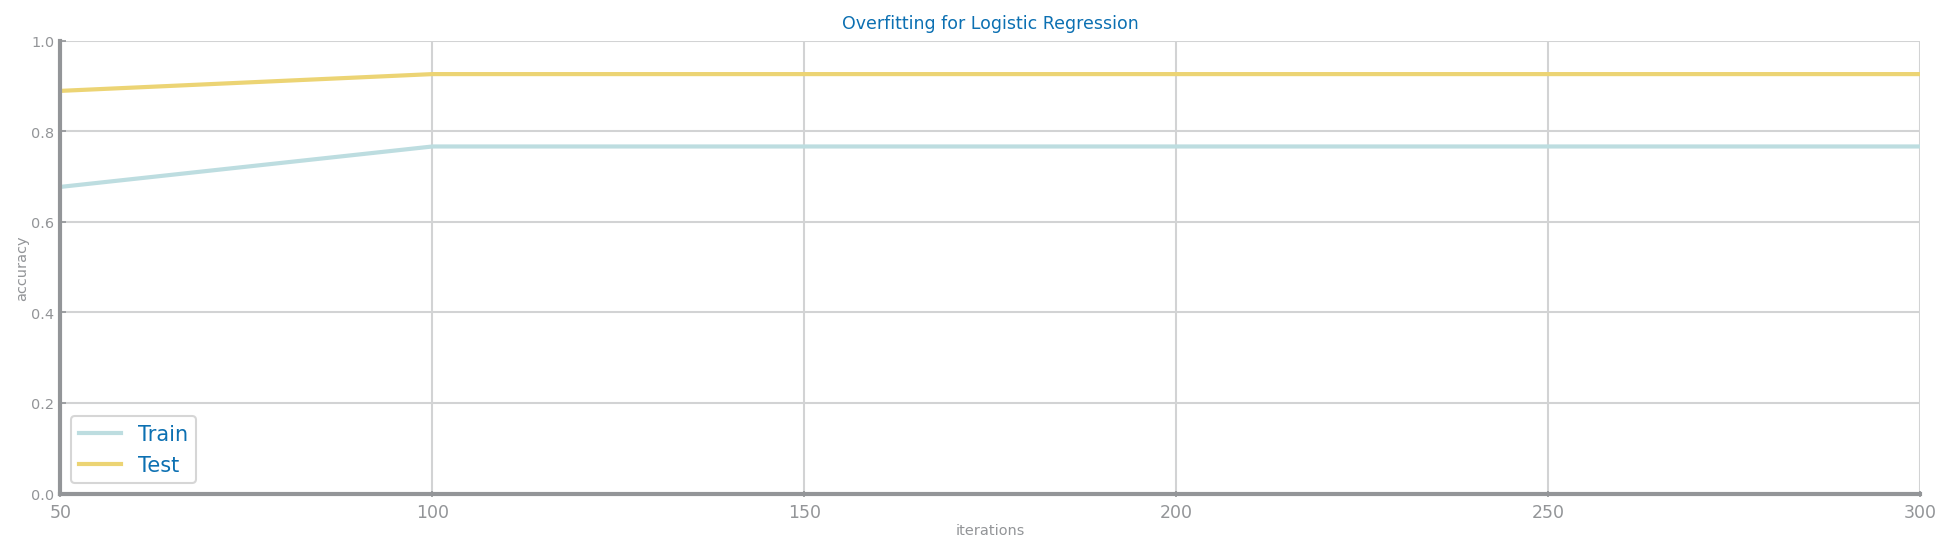

In [3]:
trnX, tstX, y, trnY, tstY, best_tree = LogRegression(hf_data_smote, 'DEATH_EVENT')

## Gradient Boosting

### With undersample

100%|██████████| 150/150 [00:27<00:00,  5.37it/s]


<Figure size 600x450 with 0 Axes>

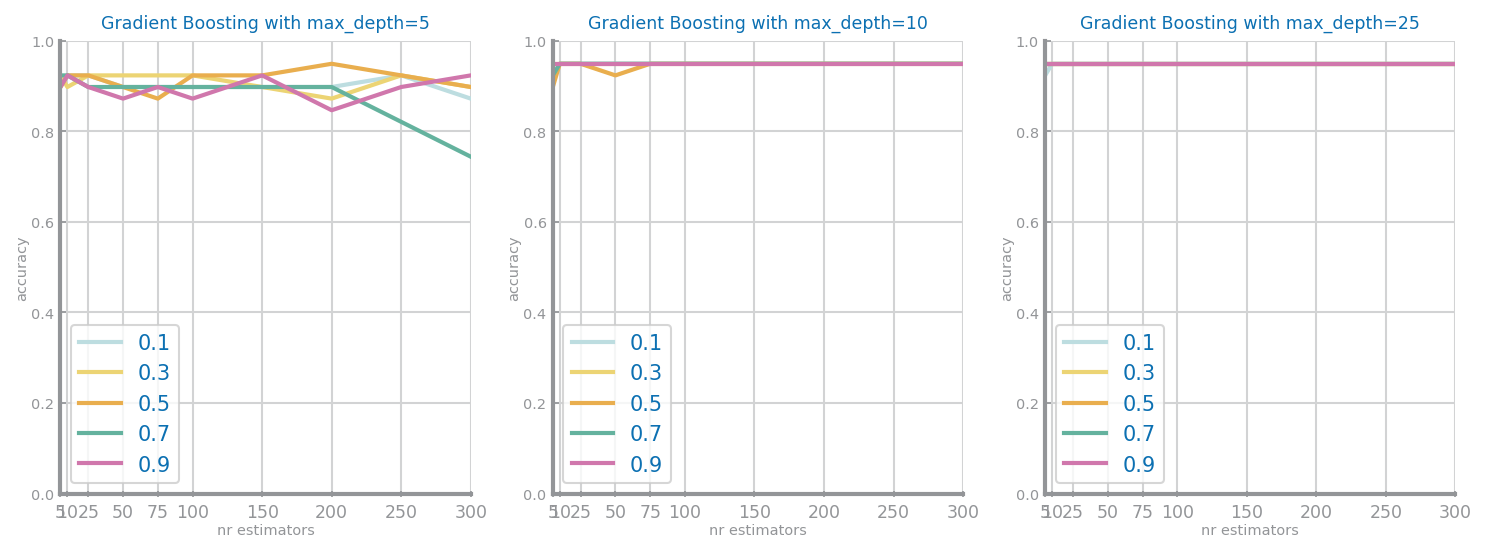

Best results with depth=5, learning rate=0.50 and 200 estimators, with accuracy=0.95


In [3]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_undersample, 'DEATH_EVENT')

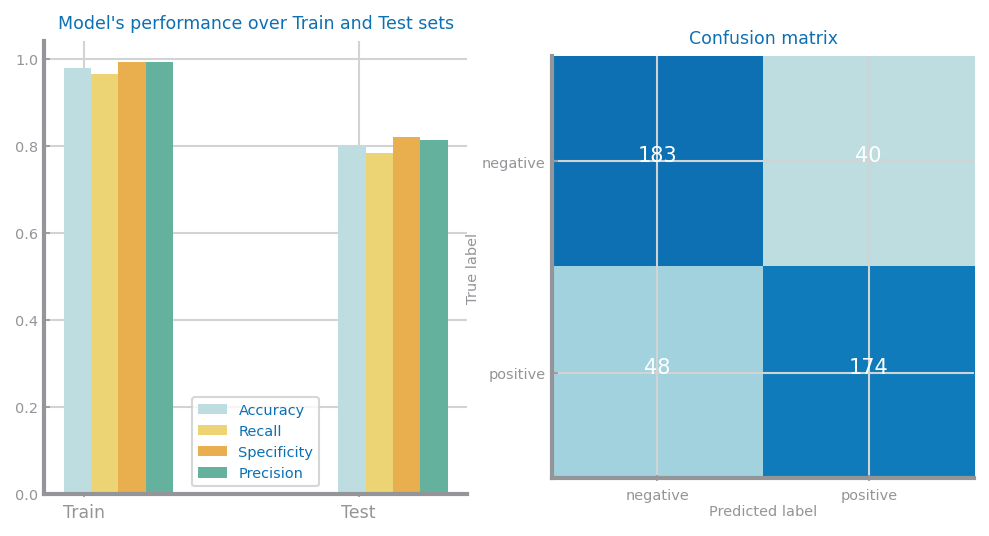

In [6]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With oversample

100%|██████████| 150/150 [00:47<00:00,  3.14it/s]


<Figure size 600x450 with 0 Axes>

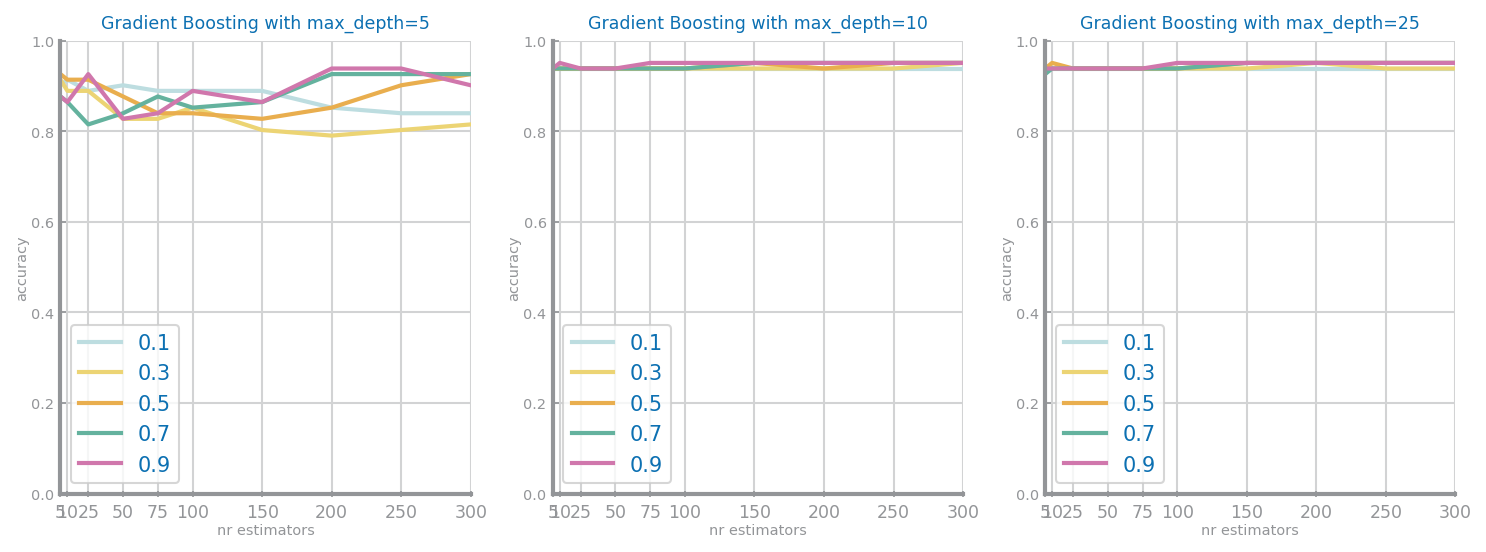

Best results with depth=10, learning rate=0.30 and 300 estimators, with accuracy=0.95


In [7]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_oversample, 'DEATH_EVENT')

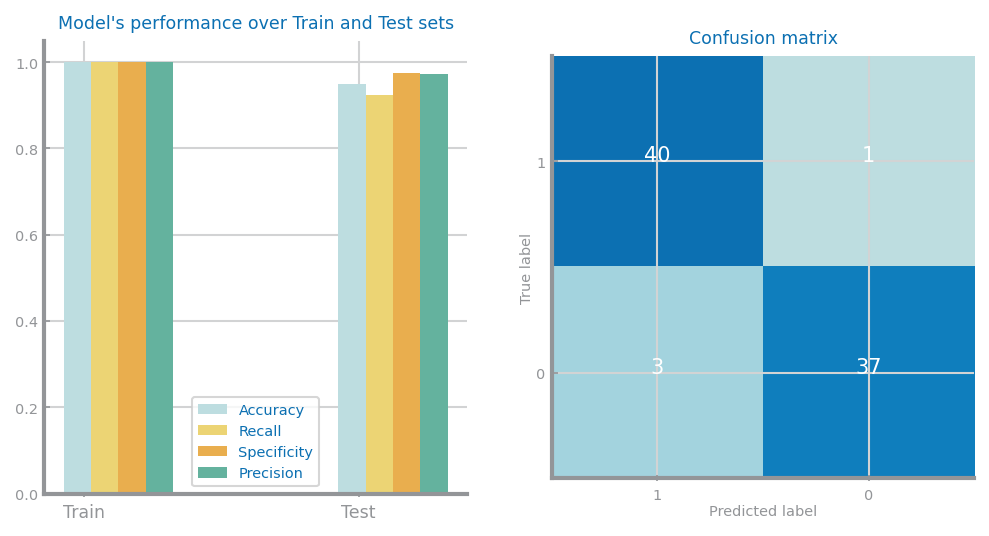

In [8]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

### With smote

100%|██████████| 150/150 [00:54<00:00,  2.74it/s]


<Figure size 600x450 with 0 Axes>

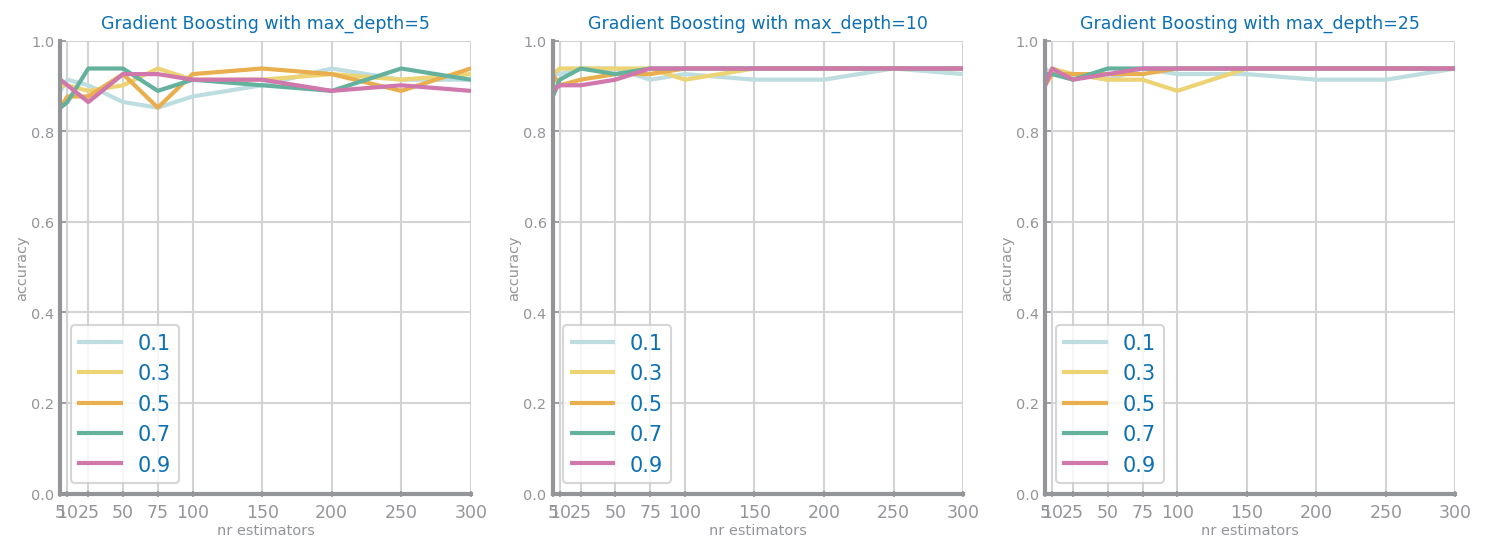

Best results with depth=5, learning rate=0.10 and 200 estimators, with accuracy=0.94


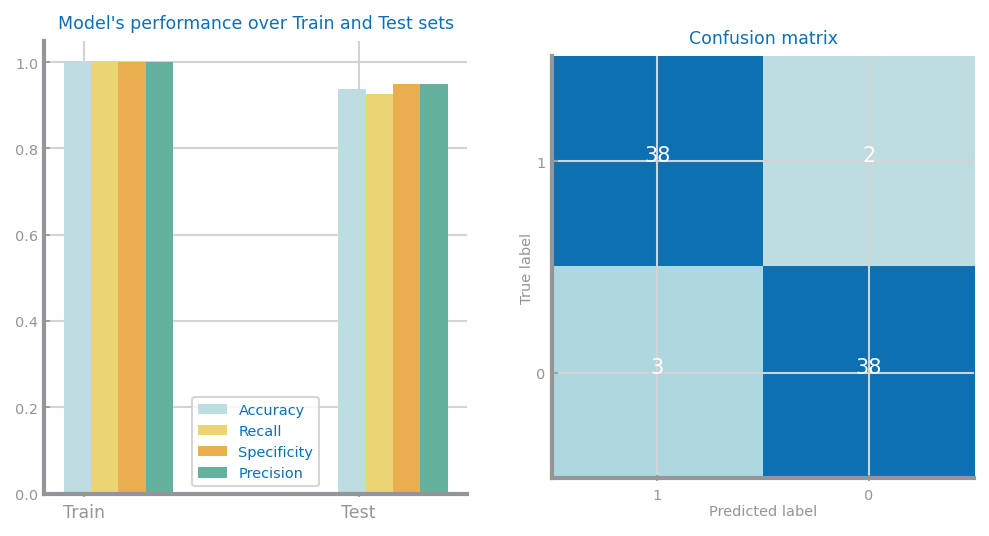

In [5]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(hf_data_smote, 'DEATH_EVENT')

# Toxicity Dataset

In [7]:
t_data = get_t_data()

## Data Balancing

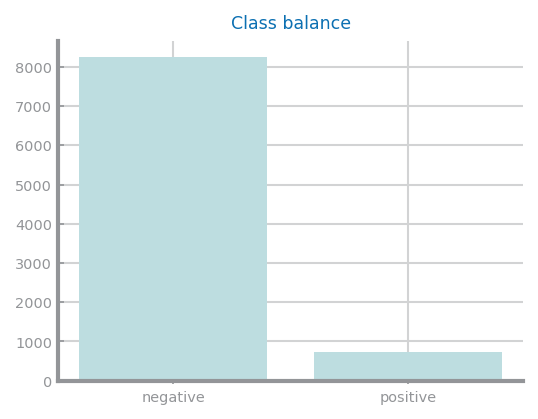

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1


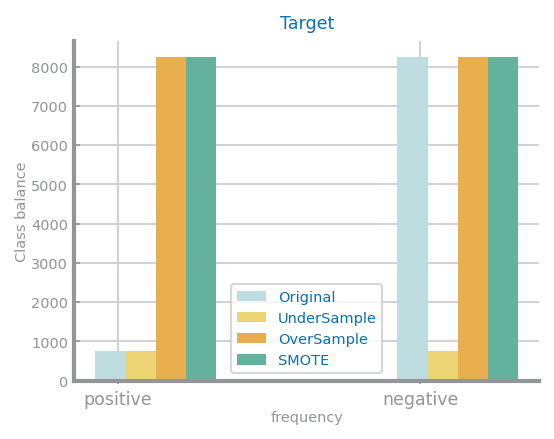

In [8]:
getBalancing(t_data, 'toxic')

## Try other approaches

In [5]:
t_data_undersample = get_t_data(feature_selection=False, balancing="undersample")
t_data_oversample = get_t_data(feature_selection=False, balancing="oversample")
t_data_smote = get_t_data(feature_selection=False, balancing="smote")

### Random Forests

100%|██████████| 24/24 [02:30<00:00,  6.29s/it]


<Figure size 600x450 with 0 Axes>

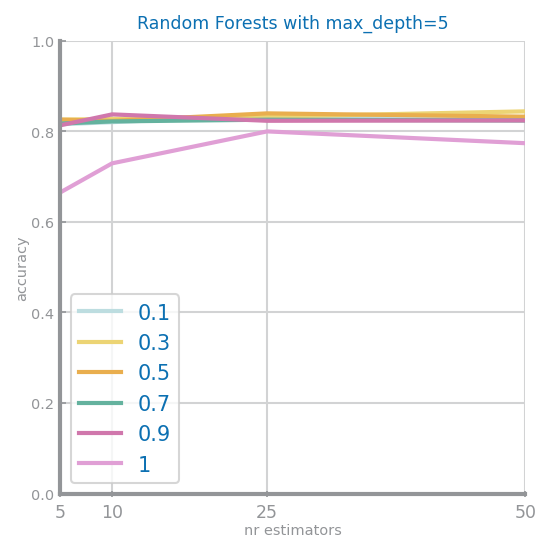

Best results with depth=5, 0.30 features and 50 estimators, with accuracy=0.8437


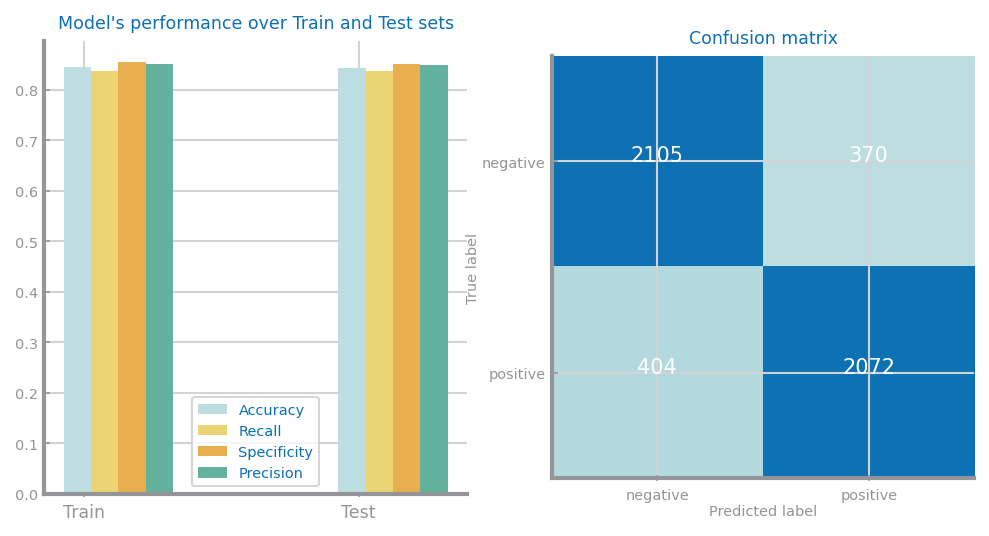

In [8]:
trnX, tstX, y, trnY, tstY, best_tree = randomForests(t_data_smote, 'toxic', kfold=False, quick=True)

### Decision Trees

100%|██████████| 60/60 [01:08<00:00,  1.14s/it]


<Figure size 600x450 with 0 Axes>

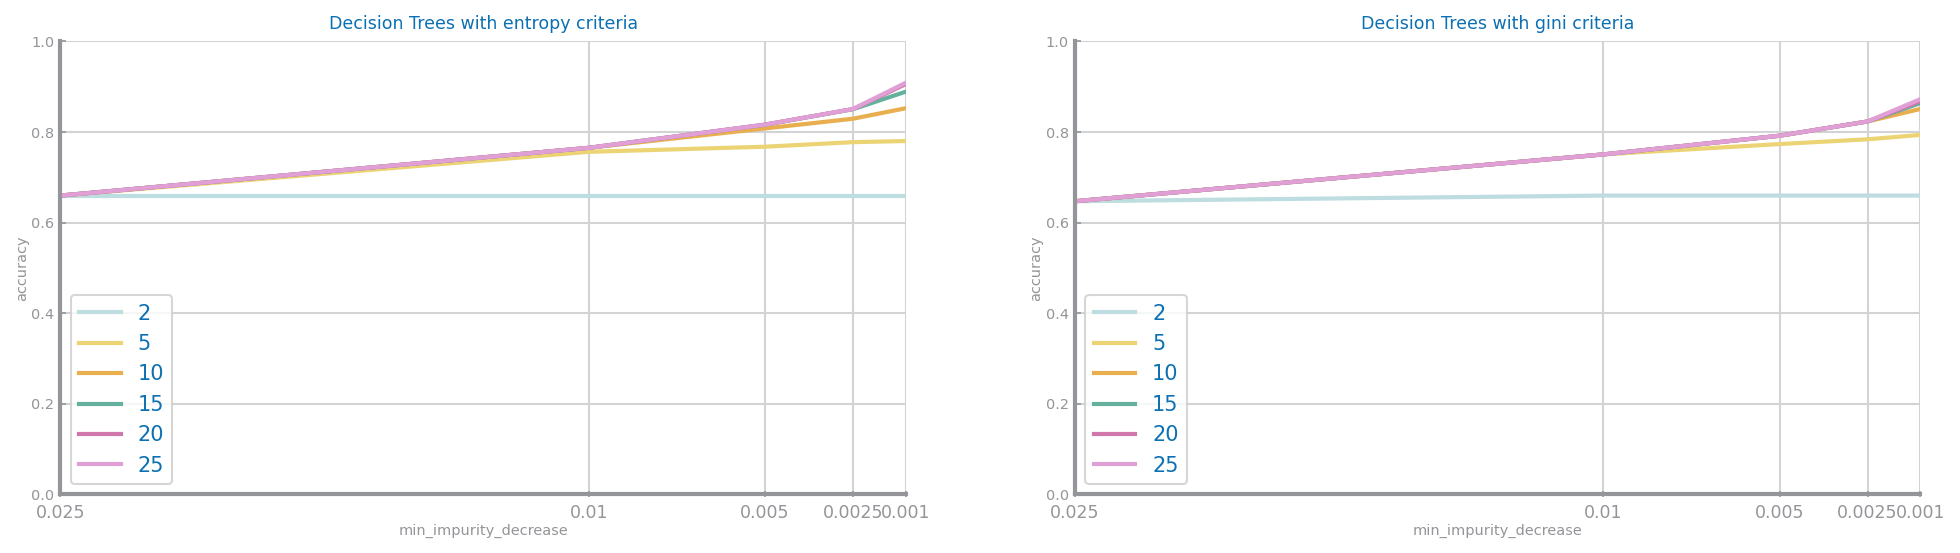

Best results achieved with entropy criteria, depth=25 and min_impurity_decrease=0.001 ==> accuracy=0.909


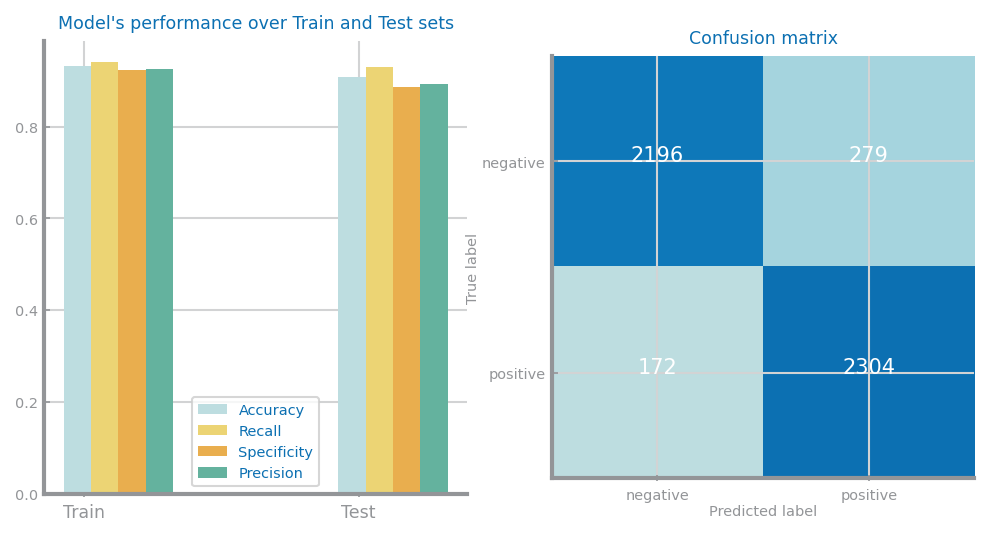

<Figure size 600x450 with 0 Axes>

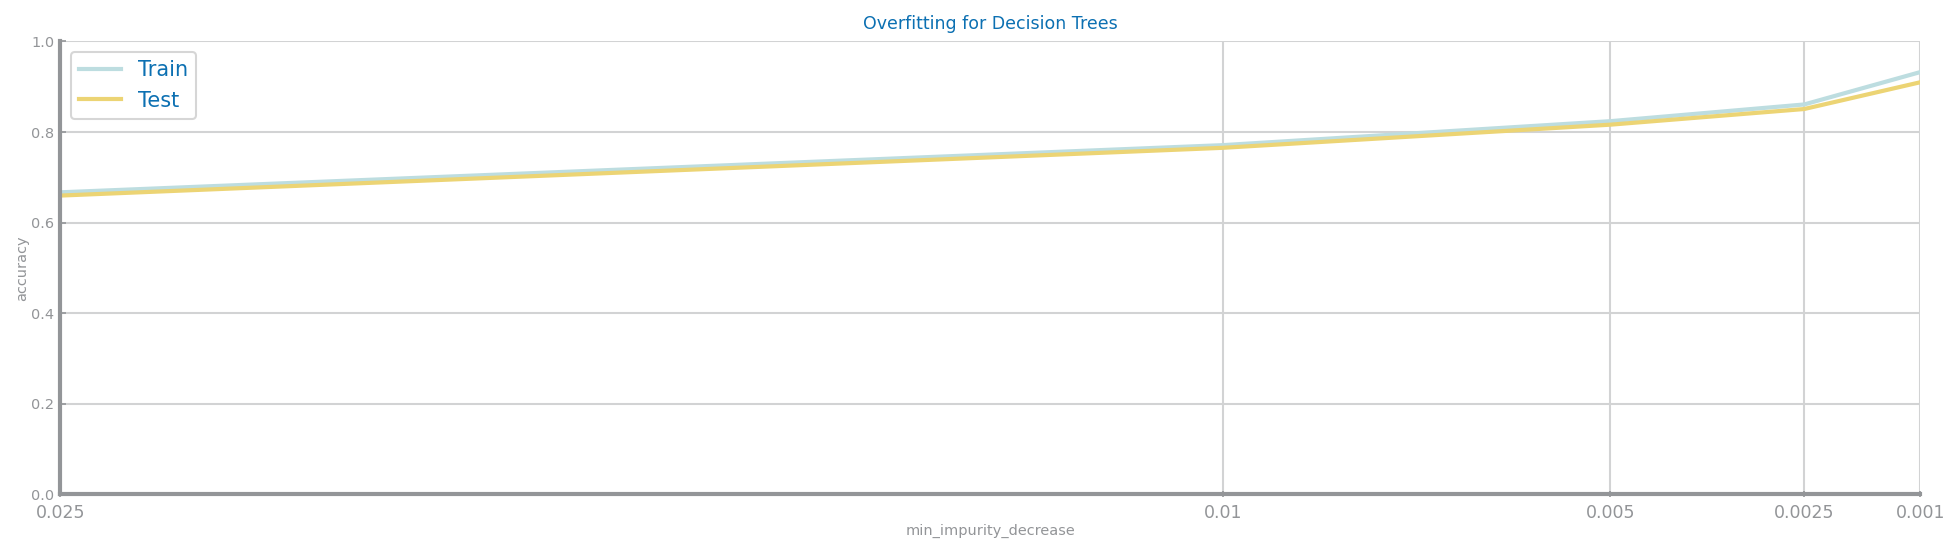

In [4]:
trnX, tstX, y, trnY, tstY, best_tree = decisionTrees(t_data_smote, 'toxic', kfold=False, quick=False)

### Logistic Regression

100%|██████████| 8/8 [00:44<00:00,  5.58s/it]


<Figure size 600x450 with 0 Axes>

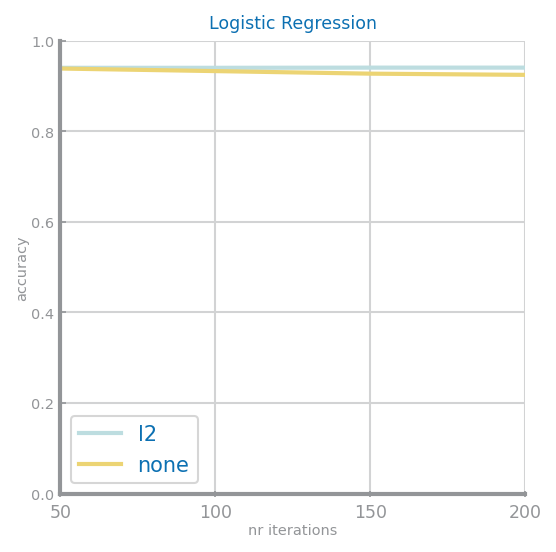

Best results with 150 iterations and l2 penalty, with accuracy=0.9402


100%|██████████| 4/4 [00:18<00:00,  4.52s/it]


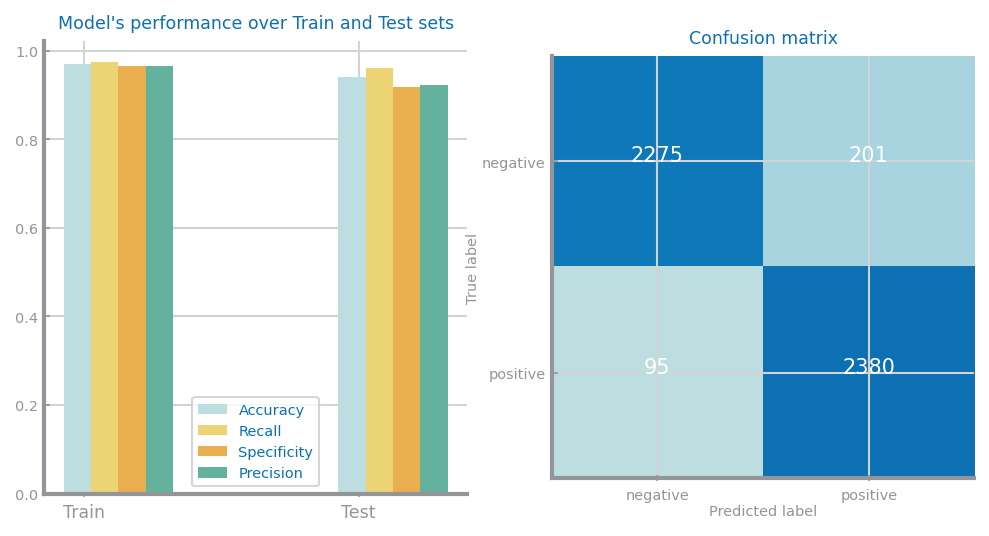

<Figure size 600x450 with 0 Axes>

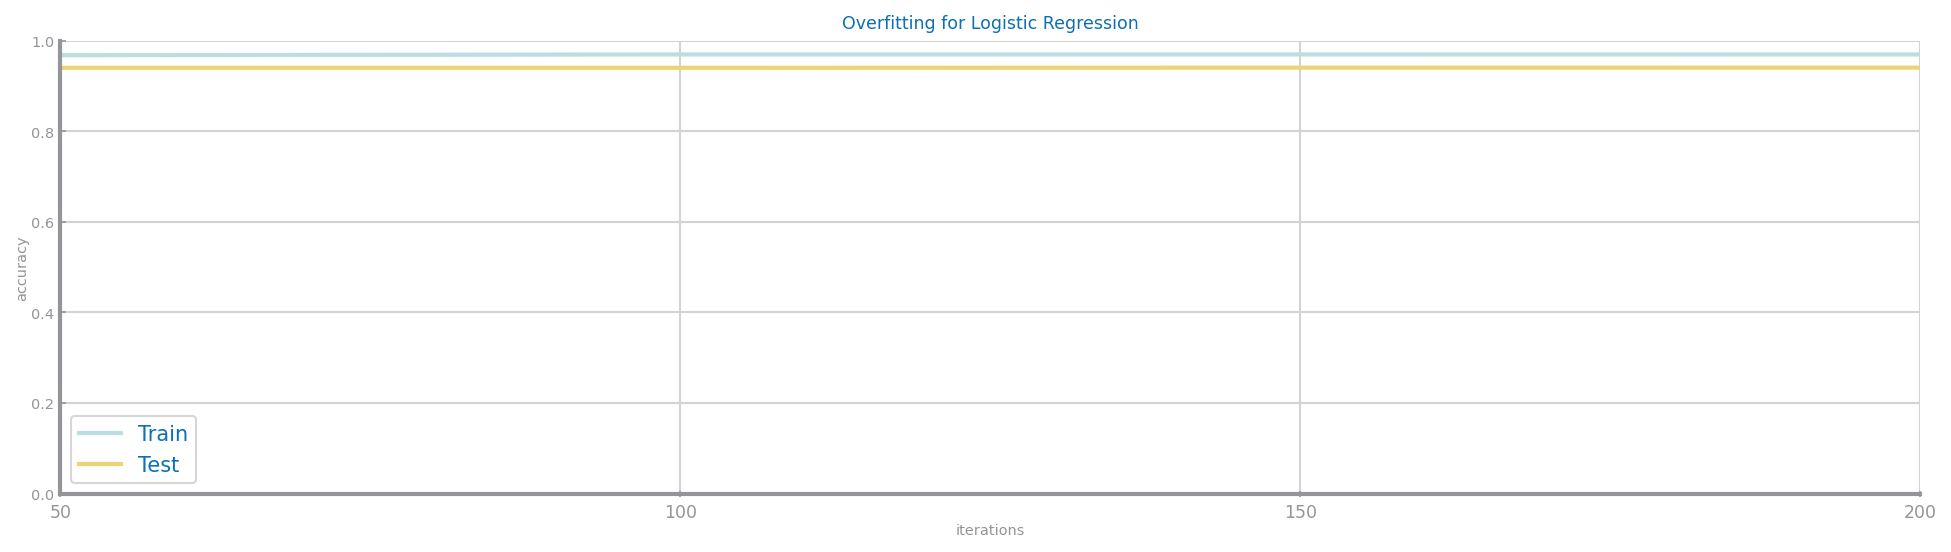

In [6]:
trnX, tstX, y, trnY, tstY, best_tree = LogRegression(t_data_smote, 'toxic', quick=True, kfold=False)

## Gradient Boosting

100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


<Figure size 600x450 with 0 Axes>

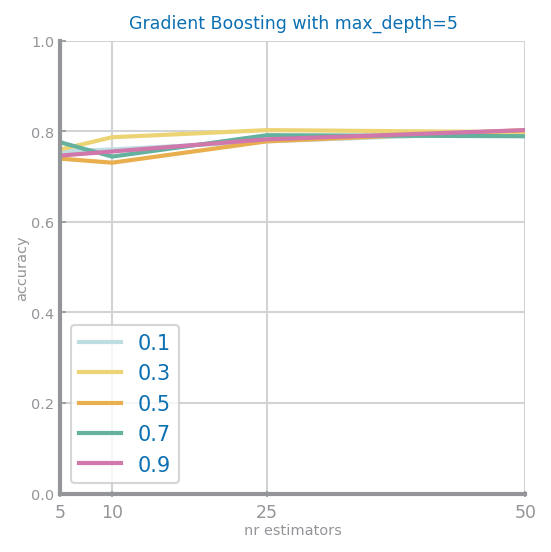

Best results with depth=5, learning rate=0.30 and 25 estimators, with accuracy=0.80


In [5]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_undersample, 'toxic', False, True)

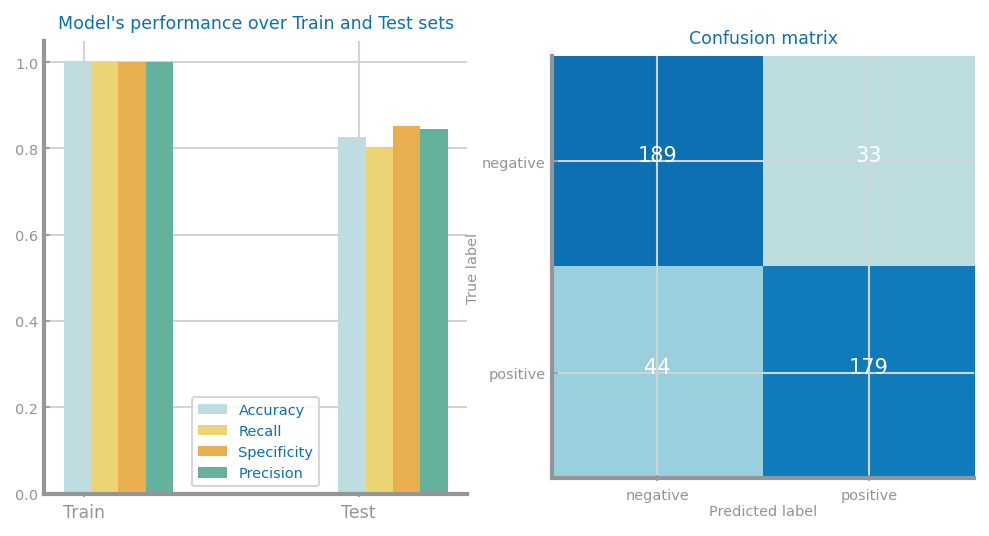

In [4]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

100%|██████████| 20/20 [08:00<00:00, 24.03s/it]


<Figure size 600x450 with 0 Axes>

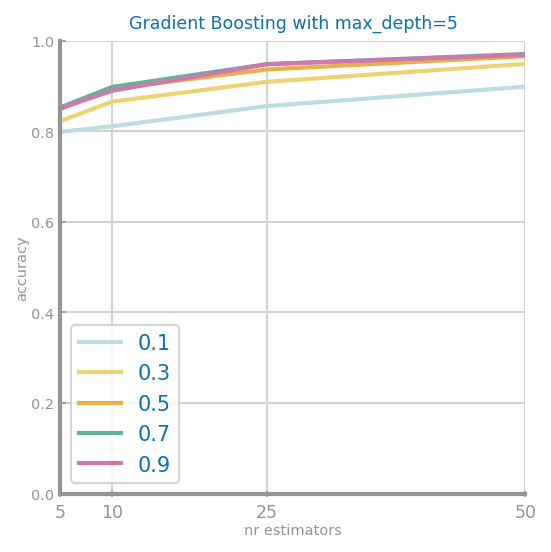

Best results with depth=5, learning rate=0.70 and 50 estimators, with accuracy=0.97


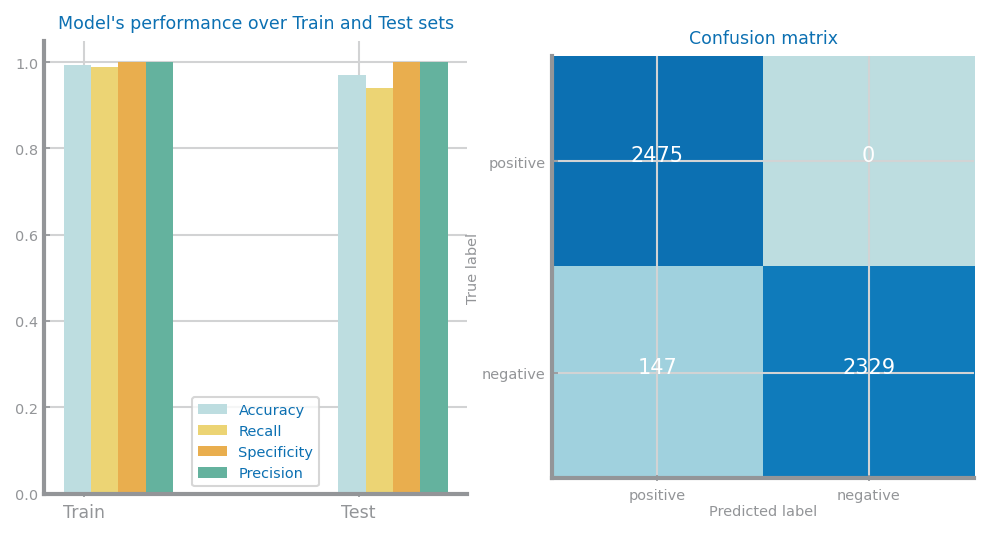

In [16]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_oversample, 'toxic', kfold=False, quick=True)

100%|██████████| 20/20 [07:51<00:00, 23.55s/it]


<Figure size 600x450 with 0 Axes>

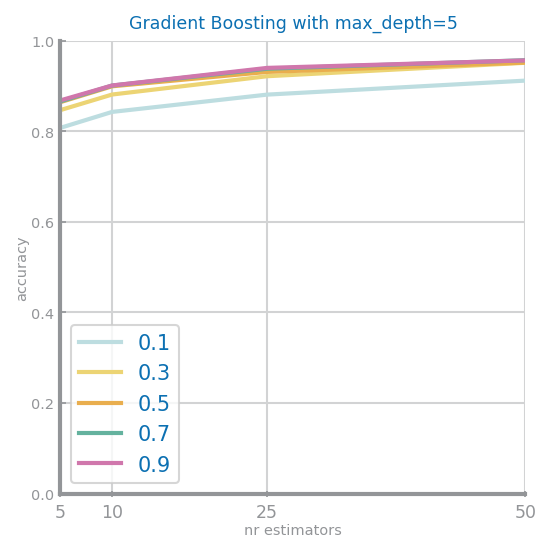

Best results with depth=5, learning rate=0.70 and 50 estimators, with accuracy=0.96


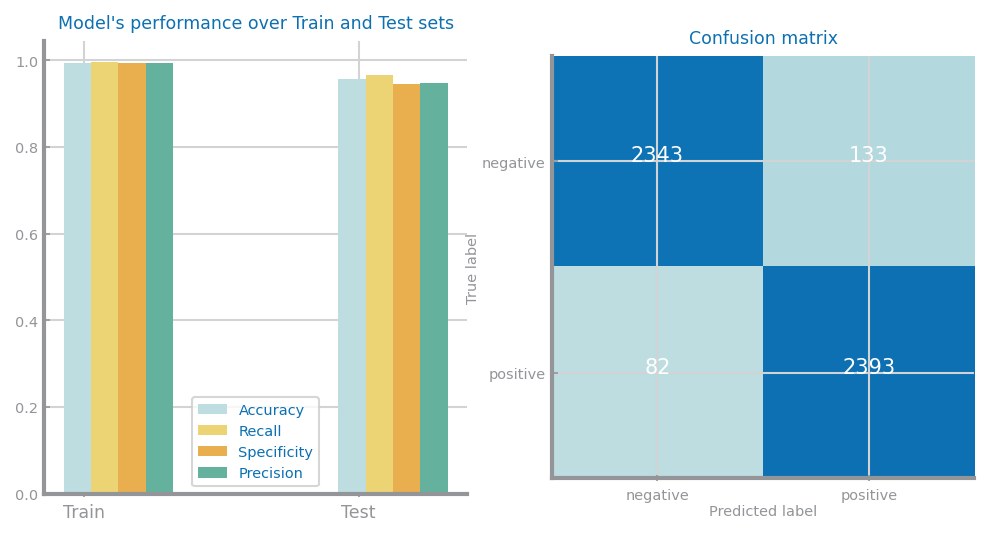

In [17]:
trnX, tstX, y, trnY, tstY, best_tree = gradientBoosting(t_data_smote, 'toxic', False, True)